
## <font color=red> You should not import any new libraries. Your code should run with python=3.x</font>

- Your solutions will be auto-graded. Hence we request you to follow the instructions.
- Modify the code only between 
```
## TODO
## END TODO
```
- In addition to above changes, you can play with arguments to the functions for generating plots
- We will run the auto grading scripts with private test data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math

c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
c:\users\aakri\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


# KMeans Algorithm

In [2]:
class Kmeans:
    """
    Implementing Kmeans algorithm.

    You may choose to define additional helper function within this class, however don't change the protype of `fit` and `predict` classes.   
    """

    def __init__(self, n_clusters, random_state):
        """
        Implement of kMeans algorithm

        Args:
        n_clusters: int - no. of clusters
        random_state: int - changing this should change initial cluster centers
        """

        self.n_clusters = n_clusters
        self.random_state = random_state
        
    def init_clusters(self, X):
        ### Initialize cluster_centers using n_clusters points sampled from data
        rs = np.random.RandomState(self.random_state)
        lis = rs.choice(X.shape[0],self.n_clusters,replace=False)
        self.cluster_centers=X[lis,:]
        
    def init_clusters2(self, X):
        
        rs = np.random.RandomState(self.random_state)
        indices = rs.choice(range(0, self.n_clusters), replace = True, size = X.shape[0])
        mean = []
        for count in range(self.n_clusters):
            mean.append(X[indices == count].mean(axis=0))
        self.cluster_centers = np.concatenate([val[ None, :] for val in mean], axis = 0)
        
    def init_clusters3(self, X):
        centers = []
    
        # Sample the first point
        rs = np.random.RandomState(self.random_state)
        initial_index = rs.choice(range(X.shape[0]), )
        centers.append(X[initial_index, :].tolist())


        # Loop and select the remaining points
        for i in range(self.n_clusters - 1):
            distance = np.sum((np.array(centers) - X[:, None, :])**2, axis = 2)

            if i == 0:
                pdf = distance/np.sum(distance)
                centroid_new = X[rs.choice(range(X.shape[0]), replace = False, p = pdf.flatten())]
            else:
                # Calculate the distance of each point from its nearest centroid
                dist_min = np.min(distance, axis = 1)
                pdf = dist_min/np.sum(dist_min)
                
                # Sample one point from the given distribution
                centroid_new = X[rs.choice(range(X.shape[0]), replace = False, p = pdf)]
                
            centers.append(centroid_new.tolist())

        self.cluster_centers = np.array(centers)

    
    def fit(self, X):
        """
        Implement of kMeans algorithm and stores cluster centers as class object

        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        Nothing
        """
        ## TODO
        
        self.init_clusters3(X)
        
        max_iter = 1000
        epsilon = 1e-8
        
        n = X.shape[0]
        labels = np.zeros((n,1)) 
        for it in range(max_iter):        
            
            new_cen = np.zeros(self.cluster_centers.shape)
            new_cen[:,:] = self.cluster_centers[:,:]
            
            centres_ex = self.cluster_centers[: , np.newaxis, :]
            labels=np.argmin(np.sum(((X - centres_ex)**2),axis=2), axis=0)
            
            for i in range(self.n_clusters): 
                mask = (labels==i)
                if(np.sum(mask) == 0):
                    continue
                    
                new_cen[i,:]=np.mean(X[mask, :],axis=0)
                
        ### Check for convergence
        ### Stop if distance between each of the old and new cluster centers is less than epsilon
            if(np.max(np.sqrt(np.sum((new_cen-self.cluster_centers)**2,axis=1)))<epsilon):
                break
            self.cluster_centers[:,:]=new_cen[:,:]
        ## END TODO
    
    def predict(self, X):
        """
        Uses the stored cluster centers from fit to predict labels. 
        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        Y: Labels for each of the data point in X. np
        """
        Y = None
        ## TODO
        
        centres_ex = self.cluster_centers[: , np.newaxis, :]
        Y=np.argmin(np.sum(((X - centres_ex)**2),axis=2), axis=0)

        ## END TODO
        assert Y.shape == (X.shape[0],), "Return Y in expected format"
        return Y

## LOAD DATA 1

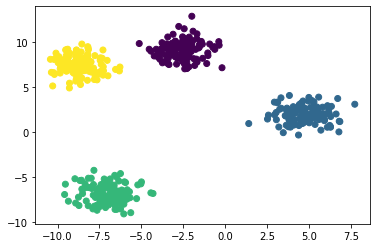

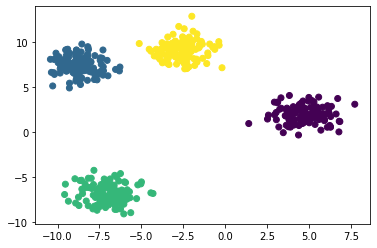

In [3]:
X = np.load('./data/train_X_1.npy')
Y = np.array([np.load('./data/train_Y_1.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.figure()

km = Kmeans(4,123)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

## LOAD DATA 2

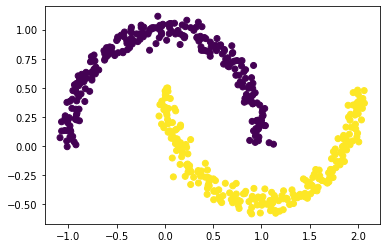

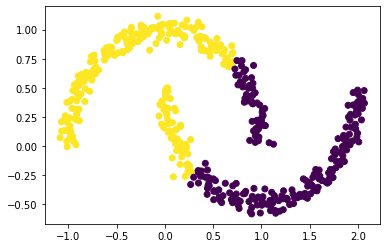

In [4]:
X = np.load('./data/train_X_2.npy')
Y = np.array([np.load('./data/train_Y_2.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.figure()

km = Kmeans(2,123)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

## LOAD DATA 3

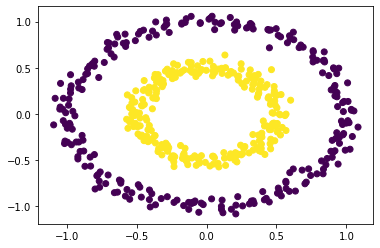

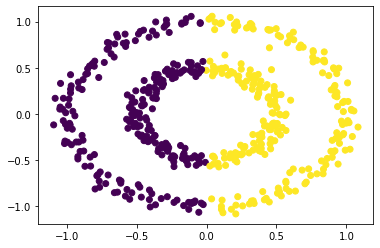

In [5]:
X = np.load('./data/train_X_3.npy')
Y = np.array([np.load('./data/train_Y_3.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.figure()

km = Kmeans(2,123)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

# Simple Kernel Design

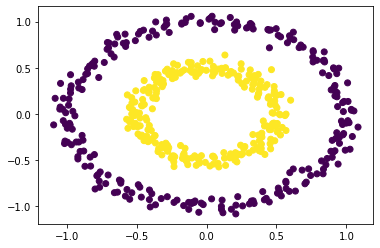

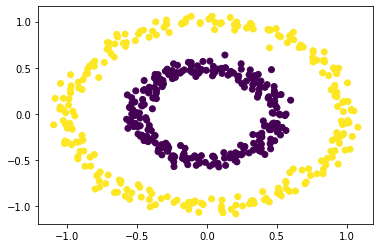

In [6]:
class Kmeans_Kernel:
    """
    Implementing Kmeans algorithm.

    You may choose to define additional helper function within this class, however don't change the protype of `fit` and `predict` classes.   
    """

    def __init__(self, n_clusters, random_state):
        """
        Implement of kMeans algorithm 

        Args:
        n_clusters: int - no. of clusters
        random_state: int - changing this should change initial cluster centers
        """

        self.n_clusters = n_clusters
        self.random_state = random_state

    def make_zero_centered(self, X):
        """
        Returns a zero-centered concentric circles Dataset

        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        X : numpy array of shape (n_samples, 2)
        """
        ## TODO
        
        mu = np.mean(X, axis=0)
        X -= mu
        
        ## END TODO

        return X
    
    def new_kernel(self, X,Y):
        '''Returns the gram matrix

        Arguments:
        X - numpy array of size n x d
        Y - numpy array of size m x d
        Return:
        K - numpy array of size n x m
        '''
        n = X.shape[0]
        m = Y.shape[0]
        rown=np.linalg.norm(X, axis=1).reshape((n,1))
        colm=np.linalg.norm(Y, axis=1).reshape((1,m))
        K=np.dot(rown, colm)
        return K
    def calculate_dist(self, K, dist):
        """Compute a n_samples x n_clusters distance matrix using the 
        kernel trick."""
        for j in range(self.n_clusters):
            mask = self.cluster_id == j
            dist[:, j] += np.mean(K[mask][:, mask])
            dist[:, j] -= 2*np.mean(K[:, mask], axis=1)
            
        for i in range(K.shape[0]):
            dist[i, :] += K[i][i]

    
    def fit(self, X):
        """
        Implement of kMeans algorithm along with using a suitable kernel and stores cluster centers as class object

        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        Nothing
        """
        ## TODO
        
        # initialise constants - maximum iterations, number of samples and tolerance for stopping
        max_iter = 1000
        n_samples = X.shape[0]        
        tol = 1e-8
        
        # make data zero centered
        X = self.make_zero_centered(X)
        
        # do kernel transformation
        K = self.new_kernel(X, X)
        
        # make initial centroids 
        rs = np.random.RandomState(self.random_state)
        self.cluster_id = rs.choice(self.n_clusters,n_samples)
        
        # initialise distancces
        distances = np.zeros((n_samples, self.n_clusters))
        
        # perform iterative clusterig
        for it in range(max_iter):
            distances.fill(0)
            self.calculate_dist(K, distances)
            old_id = self.cluster_id
            self.cluster_id = distances.argmin(axis=1)
            
            ### Stopping criteria
            # Compute the number of samples whose cluster did not change in this iteration
            n_same = np.sum((self.cluster_id - old_id) == 0)
            
            # if fraction of unchanged samples are less than tolerance, stop!
            if (1 - float(n_same)/n_samples) < tol:
                break
                
        self.X_fit = X

        ## END TODO
    
    def predict(self, X):
        """
        Uses the stored cluster centers from fit to predict labels using the kernel. 
        Args:
        X : numpy array of shape (n_samples, 2)
        
        Returns:
        Y: Labels for each of the data point in X.
        """
        ## TODO
        
        X = self.make_zero_centered(X)
        
        K = self.new_kernel(X, self.X_fit)
        n_samples = X.shape[0]
        distances = np.zeros((n_samples, self.n_clusters))
        self.calculate_dist(K, distances)
        Y = distances.argmin(axis=1)
        return Y

        ## END TODO

X = np.load('./data/train_X_3.npy')
Y = np.array([np.load('./data/train_Y_3.npy')]).T
Y = np.squeeze(Y)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.figure()

km = Kmeans_Kernel(2,123)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)

# Kernelized classification

## 3 a) Gram Matrix

In [7]:
def linear_kernel(X,Y,sigma=None):
	'''Returns the gram matrix for a linear kernel
	
	Arguments:
		X - numpy array of size n x d
		Y - numpy array of size m x d
		sigma - dummy argment, don't use
	Return:
		K - numpy array of size n x m
	''' 
	# TODO 
	# NOTE THAT YOU CANNOT USE FOR LOOPS HERE
	return X @ Y.T
	# END TODO

def gaussian_kernel(X,Y,sigma=0.1):
	'''Returns the gram matrix for a rbf
	
	Arguments:
		X - numpy array of size n x d
		Y - numpy array of size m x d
		sigma - The sigma value for kernel
	Return:
		K - numpy array of size n x m
	'''
	# TODO
	# NOTE THAT YOU CANNOT USE FOR LOOPS HERE 
	n = X.shape[0]
	m = Y.shape[0]
	d = X.shape[1]
	rown = np.sum(X**2,axis=1).reshape((n,1))
	coln = np.sum(Y**2,axis=1).reshape((1,m))
	K = -2*(X @ Y.T) 
	K += rown + coln
	return np.exp(-1*K/(2*sigma*sigma))
	# END TODO